In [81]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
from numpy import pi

Classical [4,2,2] code

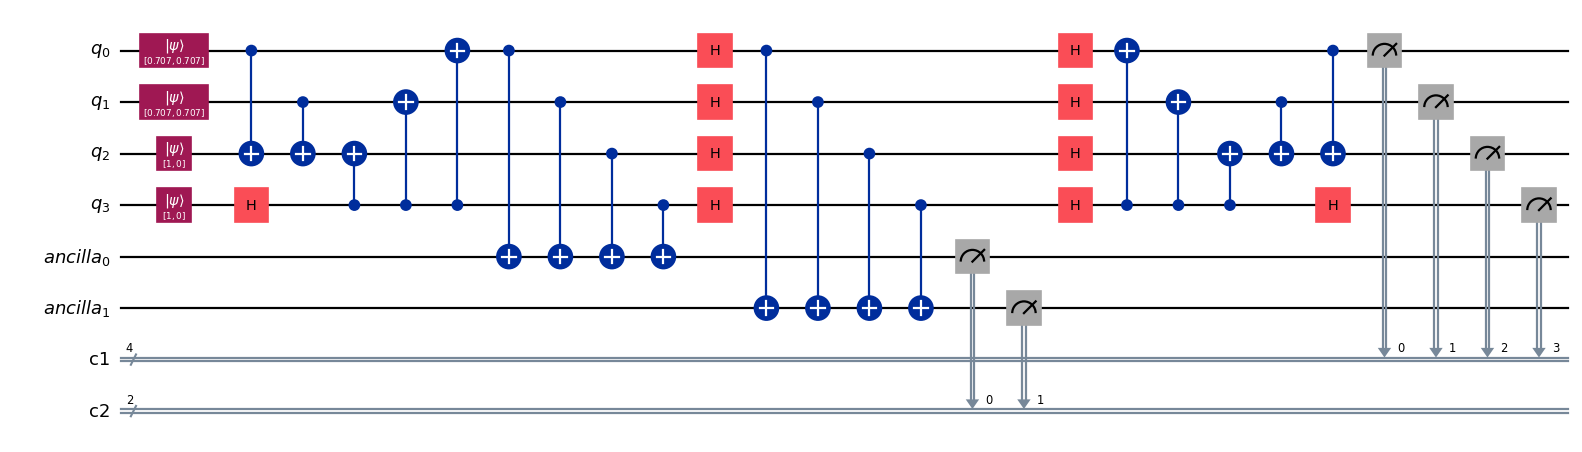

In [88]:
qreg = QuantumRegister(4, 'q')
ancilla = QuantumRegister(2, 'ancilla')
creg1 = ClassicalRegister(4, 'c1')
creg2 = ClassicalRegister(2, 'c2')

qcirc = QuantumCircuit(qreg, ancilla, creg1, creg2)
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #prepare state in superposition
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 1)
qcirc.initialize([1, 0], 2)
qcirc.initialize([1, 0], 3)

##### encoder
qcirc.h(qreg[3])
qcirc.cx(qreg[0],qreg[2])
qcirc.cx(qreg[1],qreg[2])
qcirc.cx(qreg[3],qreg[2])
qcirc.cx(qreg[3],qreg[1])
qcirc.cx(qreg[3],qreg[0])
#####

#error
qcirc.barrier()
#qcirc.z(0)
#qcirc.x(1)
qcirc.barrier()

for i in range(4):
    qcirc.cx(qreg[i],ancilla[0])

qcirc.barrier()

qcirc.h(qreg)

qcirc.barrier()

for i in range(4):
    qcirc.cx(qreg[i],ancilla[1])

qcirc.barrier()
qcirc.measure(ancilla, creg2)
qcirc.barrier()
qcirc.h(qreg)
qcirc.barrier()

##### decoder 
qcirc.cx(qreg[3],qreg[0])
qcirc.cx(qreg[3],qreg[1])
qcirc.cx(qreg[3],qreg[2])
qcirc.cx(qreg[1],qreg[2])
qcirc.barrier()
qcirc.cx(qreg[0],qreg[2])
qcirc.h(qreg[3])
qcirc.barrier()
#####

qcirc.measure(qreg, creg1)

qcirc.draw("mpl", scale=0.8, fold=-1, plot_barriers=False)

In [89]:
simulator = AerSimulator(method="automatic")
tqc = transpile(qcirc, simulator)
result = simulator.run(tqc, shots=10).result()

{'000010': 2, '000001': 2, '000000': 5, '000011': 1}


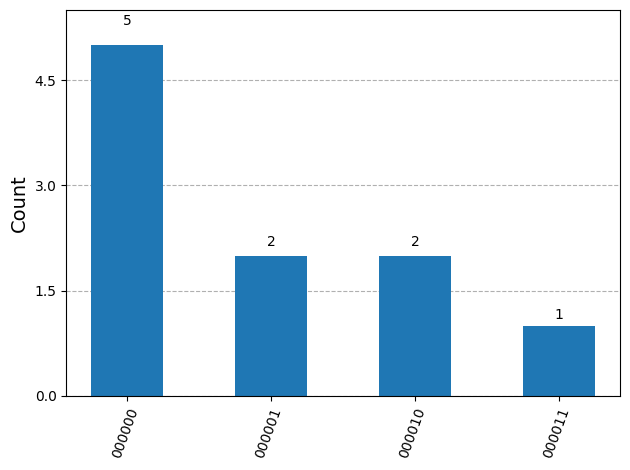

In [90]:
from qiskit.result import marginal_counts
counts = result.get_counts(tqc)

data_counts = marginal_counts(counts)#, indices=range(0,9))

print(data_counts)
plot_histogram(data_counts)

Transpiled code [4,2,2] for gates $R_{x}, R_{y}$, CZ

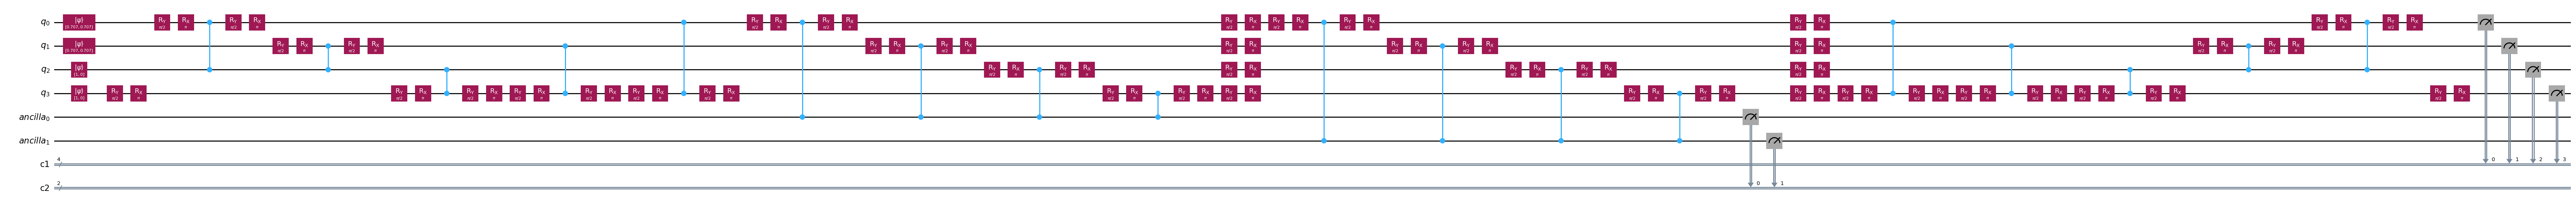

In [91]:
qreg = QuantumRegister(4, 'q')
ancilla = QuantumRegister(2, 'ancilla')
creg1 = ClassicalRegister(4, 'c1')
creg2 = ClassicalRegister(2, 'c2')

qcirc = QuantumCircuit(qreg, ancilla, creg1, creg2)
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #prepare state in superposition
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 1)
qcirc.initialize([1, 0], 2)
qcirc.initialize([1, 0], 3)

def hadamar(qubit):
    qcirc.ry(pi/2,qubit)
    qcirc.rx(pi,qubit)
    qcirc.barrier()

def cnot(qubit1, qubit2):
    hadamar(qubit1)
    qcirc.cz(qubit1, qubit2)
    hadamar(qubit1)
    qcirc.barrier()

##### encoder
hadamar(qreg[3])

cnot(qreg[0],qreg[2])
cnot(qreg[1],qreg[2])
cnot(qreg[3],qreg[2])
cnot(qreg[3],qreg[1])
cnot(qreg[3],qreg[0])
#####

##### error
qcirc.barrier()
#qcirc.z(0)
#qcirc.x(1)
qcirc.barrier()

for i in range(4):
    cnot(qreg[i],ancilla[0])

qcirc.barrier()
hadamar(qreg)

qcirc.barrier()

for i in range(4):
    cnot(qreg[i],ancilla[1])

qcirc.barrier()
qcirc.measure(ancilla, creg2)
qcirc.barrier()
hadamar(qreg)
qcirc.barrier()

##### decoder 
cnot(qreg[3],qreg[0])
cnot(qreg[3],qreg[1])
cnot(qreg[3],qreg[2])
cnot(qreg[1],qreg[2])
qcirc.barrier()
cnot(qreg[0],qreg[2])
hadamar(qreg[3])
qcirc.barrier()
#####

qcirc.measure(qreg, creg1)

qcirc.draw("mpl", scale=1, fold=-1, plot_barriers=False)

In [92]:
simulator = AerSimulator(method="automatic")
tqc = transpile(qcirc, simulator)
result = simulator.run(tqc, shots=10).result()

{'000000': 4, '000001': 2, '000011': 1, '000010': 3}


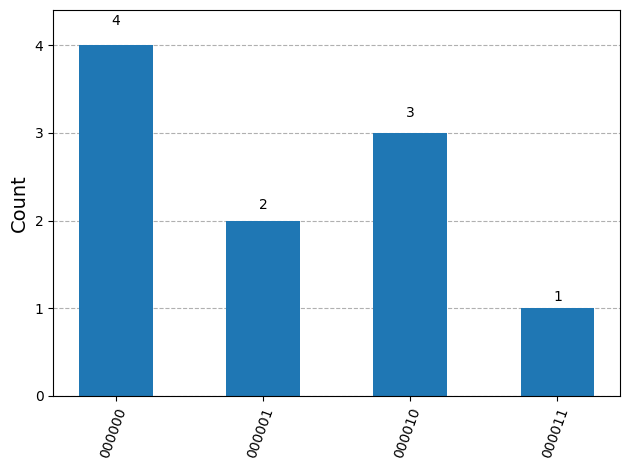

In [93]:
from qiskit.result import marginal_counts
counts = result.get_counts(tqc)

data_counts = marginal_counts(counts)#, indices=range(0,9))

print(data_counts)
plot_histogram(data_counts)